# Import bibliotek

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
import os

# Wybranie datasetu

In [2]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [3]:
x = pd.read_csv("../data/data2008.csv")
y = pd.read_csv('../data/data2009.csv')

In [4]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [5]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Odrzucanie wartości wysoce skorelowanych i niewaznych

In [6]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am','WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

# Wyświetl wartości kategoryczne i liczbowe

In [7]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Location', 'RainToday', 'RainTomorrow']

In [8]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Latitude',
 'Longitude',
 'Year',
 'Month',
 'Day']

In [9]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude',
       'Year', 'Month', 'Day'],
      dtype='object')

# Podział danych

In [10]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 16), (454, 16))

# Zakodowanie zmiennej RainToday

In [12]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [13]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday_0', 'RainToday_1', 'Latitude', 'Longitude',
       'Year', 'Month', 'Day'],
      dtype='object')


In [14]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location)], axis=1)

# Utworzenie zbioru testowego.

In [15]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location)], axis=1)

In [16]:
cols = X_train.columns

In [17]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [20]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [21]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [22]:
X_train.columns

MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity3pm',),
            (  'Pressure9am',),
            (  'Pressure3pm',),
            (     'Latitude',),
            (    'Longitude',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            (  'RainToday_0',),
            (  'RainToday_1',),
            (     'Adelaide',),
            (       'Albany',),
            (       'Albury',),
            ( 'AliceSprings',),
            (     'Ballarat',),
            (      'Bendigo',),
            (     'Brisbane',),
            (       'Cairns',),
            (     'Canberra',),
            (       'Darwin',),
            (    'GoldCoast',),
            (       'Hobart',),
            (   'Launceston',),
            (    'Melbourne',),
            ( 'MountGambier',),
        

# Predykcja wyników

In [23]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [24]:
logreg.predict_proba(X_test)[:, 0]

array([0.80338651, 0.81586197, 0.82884095, 0.87037307, 0.76646837,
       0.70058132, 0.49572802, 0.88257958, 0.75974696, 0.87329062,
       0.73538618, 0.77257868, 0.81612931, 0.71612337, 0.86429881,
       0.80123948, 0.79873668, 0.82023043, 0.81932545, 0.75950053,
       0.84587485, 0.72057207, 0.85593151, 0.85914254, 0.91637999,
       0.80064312, 0.82453492, 0.69573532, 0.90650297, 0.72948938,
       0.76204624, 0.66740907, 0.85284591, 0.83604942, 0.91832365,
       0.78294811, 0.81519795, 0.78201783, 0.74803149, 0.76693311,
       0.84939329, 0.77216318, 0.82780656, 0.54211188, 0.91804235,
       0.89409305, 0.69767703, 0.86496802, 0.90666352, 0.86140774,
       0.80267814, 0.6563679 , 0.88931797, 0.893496  , 0.71501145,
       0.73207447, 0.83268725, 0.77510222, 0.76448704, 0.67236445,
       0.93377932, 0.88642936, 0.92432492, 0.63125391, 0.90950991,
       0.89711931, 0.76658493, 0.85370881, 0.93424732, 0.81838089,
       0.53940257, 0.7447186 , 0.78339394, 0.88334512, 0.90233

In [25]:
logreg.predict_proba(X_test)[:, 1]

array([0.19661349, 0.18413803, 0.17115905, 0.12962693, 0.23353163,
       0.29941868, 0.50427198, 0.11742042, 0.24025304, 0.12670938,
       0.26461382, 0.22742132, 0.18387069, 0.28387663, 0.13570119,
       0.19876052, 0.20126332, 0.17976957, 0.18067455, 0.24049947,
       0.15412515, 0.27942793, 0.14406849, 0.14085746, 0.08362001,
       0.19935688, 0.17546508, 0.30426468, 0.09349703, 0.27051062,
       0.23795376, 0.33259093, 0.14715409, 0.16395058, 0.08167635,
       0.21705189, 0.18480205, 0.21798217, 0.25196851, 0.23306689,
       0.15060671, 0.22783682, 0.17219344, 0.45788812, 0.08195765,
       0.10590695, 0.30232297, 0.13503198, 0.09333648, 0.13859226,
       0.19732186, 0.3436321 , 0.11068203, 0.106504  , 0.28498855,
       0.26792553, 0.16731275, 0.22489778, 0.23551296, 0.32763555,
       0.06622068, 0.11357064, 0.07567508, 0.36874609, 0.09049009,
       0.10288069, 0.23341507, 0.14629119, 0.06575268, 0.18161911,
       0.46059743, 0.2552814 , 0.21660606, 0.11665488, 0.09766

# Dokładność

In [26]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8282


# Macierz pomyłek

In [27]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[374   0]
 [ 78   2]]

True Positives(TP) =  374

True Negatives(TN) =  2

False Positives(FP) =  0

False Negatives(FN) =  78


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

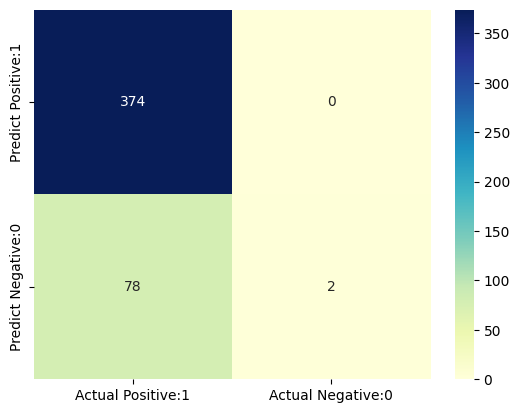

In [28]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [29]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8282


# Precyzja klasyfikatora

In [30]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [31]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

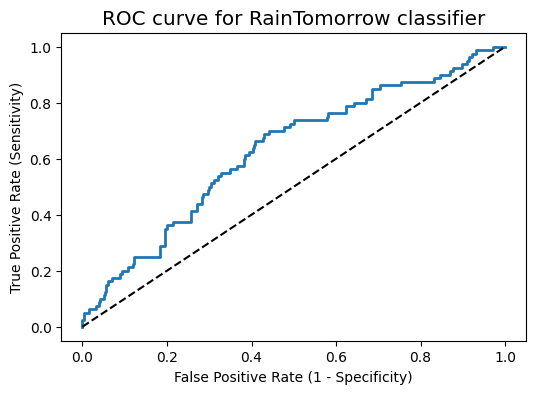

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [33]:
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the model
model_filename = os.path.join(model_dir, 'model.h5')
pickle.dump(logreg, open(model_filename, 'wb'))

# Save the encoder
encoder_filename = os.path.join(model_dir, 'encoder.pkl')
with open(encoder_filename, 'wb') as file:
    pickle.dump(encoder, file)

In [34]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

40
